In [1]:
import numpy as np
from ase.io import read
from ase.visualize import view
import matplotlib.pyplot as plt

In [2]:
sigma   = 3.405
epsilon = 119.8*8.616733e-5 # eV

In [3]:
def g_step(box, n_bin, d):
    box    += 1
    box    *= np.sqrt(2)/sigma
    del_bin = box/n_bin  #width of a bin
    
    g    = np.zeros([n_bin,n_bin])
    g[0] = np.linspace(0,box,n_bin)
    g[0]+= del_bin*0.5
    
    for i in range(len(d)):
        for j in range(i+1,len(d)):
            g_index = d[i][j]/(del_bin)
            g[1,g_index.astype(int)] += 2
            # we count both for i and j.
            
    
    #nomalized by number of particles
    g[1] /= len(d[0])
    #and by bin volume
    
    for k in range(len(g[1])):
        g[1][k] /= ((k+1)**3 -k**3)*del_bin**3
        
    #side of the optimized cell: 5,269
    vol = (5.269/sigma)**3
    rho = 4./vol
    g[1] /= np.pi*(4/3)*rho
    return g;

### 38 atom

In [4]:
trajectory = read('production_38-pos-1.xyz', index='::2')
N = len(trajectory[0])    #number of atoms
n_step = len(trajectory)  #number of step

#create a distance array
dist = np.empty([0,N,N])
for frame in trajectory:
    dist = np.append(dist, [frame.get_all_distances()],axis=0)

#Lennard Jones units

dist  /= sigma

In [5]:
#understand what the distance array is:

#dist0 = trajectory[0].get_all_distances()
# print(dist0.shape)
# print(dist0)
# print(dist0[0])

Text(0,0.5,'radial distribution function')

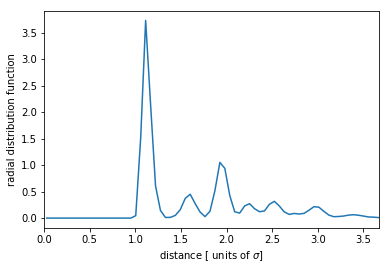

In [6]:
n_bin = 200  #number of bin in the graph
box   = 25   #side of the bon in the simulation 
g_38  = np.zeros([n_bin,n_bin])

#average during the thermalized part of the simulation
for i in range(n_step):
    g_38 += g_step(box,n_bin,dist[i])
g_38 /= n_step

plt.plot(g_38[0],g_38[1])
plt.xlim(0,box/(2*sigma))
plt.xlabel('distance [ units of $\sigma$]')
plt.ylabel('radial distribution function')

### 150 atoms

In [7]:
trajectory = read('production_150-pos-1.xyz', index='::2')
N = len(trajectory[0])    #number of atoms
n_step = len(trajectory)  #number of step

dist = np.empty([0,N,N])
for frame in trajectory:
    dist = np.append(dist, [frame.get_all_distances()],axis=0)
dist  /= sigma



Text(0,0.5,'radial distribution function')

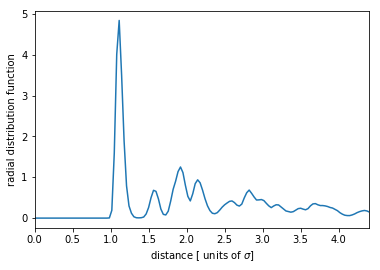

In [8]:
n_bin = 400  
box   = 30   
g_150 = np.zeros([n_bin,n_bin])


for i in range(n_step):
    g_150 += g_step(box,n_bin,dist[i])
g_150 /= n_step

plt.plot(g_150[0],g_150[1])
plt.xlim(0,box/(2*sigma))
plt.xlabel('distance [ units of $\sigma$]')
plt.ylabel('radial distribution function')

### 450 atoms

In [9]:
trajectory = read('production_450-pos-1.xyz', index='::2')
N = len(trajectory[0])    #number of atoms
n_step = len(trajectory)  #number of step

dist = np.empty([0,N,N])
for frame in trajectory:
    dist = np.append(dist, [frame.get_all_distances()],axis=0)
dist  /= sigma



Text(0,0.5,'radial distribution function')

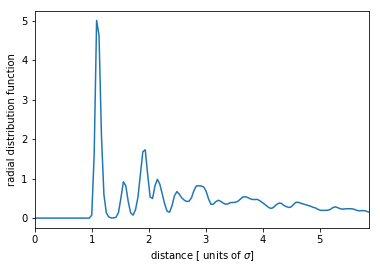

In [10]:
n_bin = 400  
box   = 40   
g_450 = np.zeros([n_bin,n_bin])


for i in range(n_step):
    g_450 += g_step(box,n_bin,dist[i])
g_450 /= n_step

plt.plot(g_450[0],g_450[1])
plt.xlim(0,box/(2*sigma))
plt.xlabel('distance [ units of $\sigma$]')
plt.ylabel('radial distribution function')

### 817 atoms

In [11]:
trajectory = read('production_817-pos-1.xyz', index='::2')
N = len(trajectory[0])    #number of atoms
n_step = len(trajectory)  #number of step

dist = np.empty([0,N,N])
for frame in trajectory:
    dist = np.append(dist, [frame.get_all_distances()],axis=0)
dist  /= sigma



Text(0,0.5,'radial distribution function')

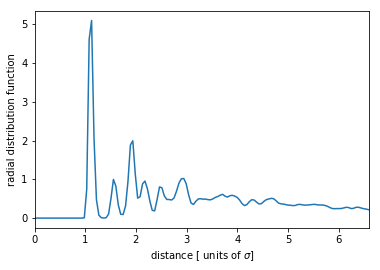

In [12]:
n_bin = 400  
box   = 45   
g_817 = np.zeros([n_bin,n_bin])


for i in range(n_step):
    g_817 += g_step(box,n_bin,dist[i])
g_817 /= n_step

plt.plot(g_817[0],g_817[1])
plt.xlim(0,box/(2*sigma))
plt.xlabel('distance [ units of $\sigma$]')
plt.ylabel('radial distribution function')

### temperature

### Thermalization plots (NVT)

in the .energ file you can find

- column 0: step
- column 1: time 
- column 2: kinetic energy
- column 3: temperature
- column 4: potential energy

Try to plot these values and describe what you see and what is conserved

Text(0,0.5,'T [K]')

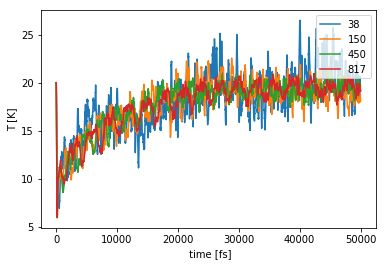

In [16]:
data38  = np.loadtxt('thermalization_38-1.ener' )
data150 = np.loadtxt('thermalization_150-1.ener')
data450 = np.loadtxt('thermalization_450-1.ener')
data817 = np.loadtxt('thermalization_817-1.ener')

data38  = np.transpose(data38)
data150 = np.transpose(data150)
data450 = np.transpose(data450)
data817 = np.transpose(data817)

plt.plot(data38[1],data38[3], label='38')
plt.plot(data150[1],data150[3], label='150')
plt.plot(data450[1],data450[3], label='450')
plt.plot(data817[1],data817[3], label='817')

plt.legend( loc='upper right')

plt.xlabel(' time [fs]')
plt.ylabel('T [K]')

### Production plots (NVE)

in the .energ file you can find

- column 0: step
- column 1: time 
- column 2: kinetic energy
- column 3: temperature
- column 4: potential energy

Try to plot these values and describe what you see and what is conserved

Text(0,0.5,'T [K]')

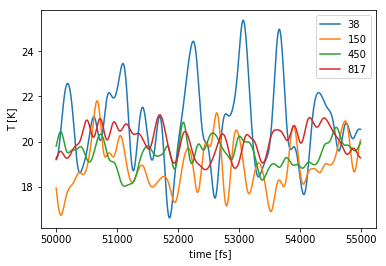

In [14]:
data38  = np.loadtxt('production_38-1.ener' )
data150 = np.loadtxt('production_150-1.ener')
data450 = np.loadtxt('production_450-1.ener')
data817 = np.loadtxt('production_817-1.ener')

data38  = np.transpose(data38)
data150 = np.transpose(data150)
data450 = np.transpose(data450)
data817 = np.transpose(data817)

plt.plot(data38[1],data38[3], label='38')
plt.plot(data150[1],data150[3], label='150')
plt.plot(data450[1],data450[3], label='450')
plt.plot(data817[1],data817[3], label='817')

plt.legend( loc='upper right')

plt.xlabel(' time [fs]')
plt.ylabel('T [K]')